# The material presented in this notebook is for using in Introduction to Deep Learning (CEE 690/ECE 590) course, Duke University, Fall 2019.

# Loading data in Pytorch

* ### Generally, when you have to deal with image, text, audio or video data, you can use standard  python packages that load data into a numpy array. Then you can convert this array into a torch Tensor.

* ### For images, packages such as Pillow, OpenCV are useful
* ### For audio, packages such as scipy, librosa, and torchaudio
* ### For text, either raw Python or Cython based loading, NLTK, Spacy, torchtext and torchnlp
* ### For vision tasks, PyTorch has created a package called torchvision, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers  for images, viz., torchvision.datasets and torch.utils.data.DataLoader.

## Load and normalizing the different training and test datasets using torchvision

In [1]:
import torch
import torch.nn as nn
import torch.optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## All datasets are subclasses of torch.utils.data.Dataset
* ### They have __getitem__ and __len__ methods implemented. 
* ### They can all be passed to a torch.utils.data.DataLoader

https://pytorch.org/docs/stable/torchvision/datasets.html

### torchvision.datasets."__Name of Dataset__"
### __Name of Dataset__ includes many datasets such as MNIST, Fashion-MNIST, ImageNet, CIFAR10, SVHN, COCO, LSUN, and so on.

### MNIST

In [2]:
bs = 64
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=bs, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=bs, shuffle=False, num_workers=2)

9920512it [00:00, 11633942.09it/s]                            


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


32768it [00:00, 213346.28it/s]           


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


1654784it [00:00, 3345177.12it/s]                            


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


8192it [00:00, 87381.11it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


### Transforms are common image transformations. They can be chained together using Compose 
### torchvision.transforms.functional module gives fine-grained control over the transformations. 

In [3]:
transforms.Compose([
    transforms.CenterCrop(10),
    transforms.ToTensor(),
])

Compose(
    CenterCrop(size=(10, 10))
    ToTensor()
)

## Transforms on PIL Image
### Define various transforms inside of Compose 

### __transforms.CenterCrop__ :  Crops the given PIL Image at the center according to the given size.
### __transforms.ColorJitter__ :  Randomly change the brightness, contrast and saturation of an image.
### __transforms.Grayscale__ : Convert image to grayscale.
### __transforms.Resize__ : Resize the input PIL Image to the given size.
### __transforms.Normalize(mean, std, inplace=False)__ : Normalize a tensor image with mean and standard deviation. 
* ### Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels, this transform will normalize each channel of the input torch.*Tensor i.e. input[channel] = (input[channel] - mean[channel]) / std[channel]

# Showing some of the training images in MNIST

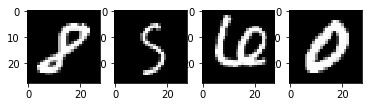

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
im = images[0:4]
fig , ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(im[i][0], cmap='gray')

In [5]:
labels[0:4]

tensor([8, 5, 6, 0])

# CIFAR10

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170500096it [00:06, 25186135.39it/s]                               


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


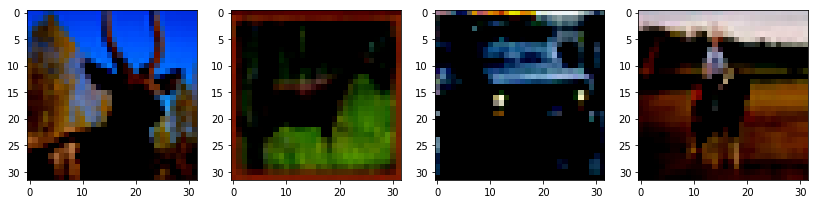

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
im = images[0:4]
fig , ax = plt.subplots(1,4, figsize=(14,6))
im = np.transpose(im, (0, 2, 3, 1))
for i in range(4):
    ax[i].imshow(im[i])

In [8]:
for i in [x for x in labels.numpy()[0:4]]:
    print(classes[i])

deer
deer
truck
horse


# Saving and Loading a Model

## Core functions to be familiar with:
* ### torch.save: Saves a serialized object to disk. This function uses Python’s pickle utility for serialization. Models, tensors, and dictionaries of all kinds of objects can be saved using this function.
* ### torch.load: Uses pickle’s unpickling facilities to deserialize pickled object files to memory. This function also facilitates the device to load the data into

### In PyTorch, the learnable parameters (i.e. weights and biases) of an torch.nn.Module model are contained in the model’s parameters (accessed with model.parameters()). 
### A __state_dict__ is simply a Python dictionary object that maps each layer to its parameter tensor.
### only layers with learnable parameters (convolutional layers, linear layers, etc.) and registered buffers (batchnorm’s running_mean) have entries in the model’s __state_dict__. 
### Optimizer objects (torch.optim) also have a __state_dict__, which contains information about the optimizer’s state, as well as the hyperparameters used.

### __state_dict__ objects are Python dictionaries, they can be easily saved, updated, altered, and restored,

## Let's define a linear regression model

In [9]:
# Define model
class Linear_Reg(nn.Module):
    def __init__(self):
        super(Linear_Reg, self).__init__()
        self.linear = nn.Linear(10, 1)

    def forward(self, x):
        x = self.linear(x)
        return x

# Initialize model
model = Linear_Reg()

# Initialize optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
linear.weight 	 torch.Size([1, 10])
linear.bias 	 torch.Size([1])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [2051399197896, 2051399196744]}]


## Two approaches for Saving & Loading Model for Inference

* ### A common PyTorch convention is to save models using either a .pt or .pth file extension.

* ### Remember that you must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

###  1- Save/Load state_dict 

In [10]:
PATH = './ckpt_state_dics.pth'
torch.save(model.state_dict(), PATH)   # Saving
model = Linear_Reg()
model.load_state_dict(torch.load(PATH))  # Loading
model.eval()

Linear_Reg(
  (linear): Linear(in_features=10, out_features=1, bias=True)
)

In [11]:
model.children

<bound method Module.children of Linear_Reg(
  (linear): Linear(in_features=10, out_features=1, bias=True)
)>

* ### When saving a model for inference, it is only necessary to save the trained model’s learned parameters. Saving the model’s __state_dict__ with the __torch.save()__ function will give you the most flexibility for restoring the model later, which is why it is the recommended method for saving models.

###  2- Save/Load Entire Model

In [12]:
PATH = './ckpt_entire.pth'
torch.save(model, PATH)

#Model class must be defined somewhere
model = torch.load(PATH)
model.eval()

D:\Anaconda3\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Linear_Reg. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Linear_Reg(
  (linear): Linear(in_features=10, out_features=1, bias=True)
)

* ### This save/load process uses the most intuitive syntax and involves the least amount of code. 
* ### Saving a model in this way will save the entire module using Python’s pickle module. 
* ### The disadvantage of this approach is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved. 
* ### The reason for this is because pickle does not save the model class itself. 
* ### It saves a path to the file containing the class, which is used during load time.
* ### The code can break in various ways when used in other projects or after refactors